In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
employee_attrition = pd.read_csv("C:/datasets/attrition.csv")

In [3]:
employee_attrition .head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,1,0.38,0.53,2,157,3,0,0,sales,low,1


In [4]:
employee_attrition.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,left
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,1,0.38,0.53,2,157,3,0,0,sales,low,1
5,2,0.80,0.86,5,262,6,0,0,sales,medium,1
6,3,0.11,0.88,7,272,4,0,0,sales,medium,1
7,4,0.72,0.87,5,223,5,0,0,sales,low,1


In [5]:
employee_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 8 non-null      int64  
 1   satisfaction_level     8 non-null      float64
 2   last_evaluation        8 non-null      float64
 3   number_project         8 non-null      int64  
 4   average_monthly_hours  8 non-null      int64  
 5   time_spend_company     8 non-null      int64  
 6   Work_accident          8 non-null      int64  
 7   promotion_last_5years  8 non-null      int64  
 8   dept                   8 non-null      object 
 9   salary                 8 non-null      object 
 10  left                   8 non-null      int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 704.0+ bytes


## correlation matrix

In [6]:
corr_matrix =employee_attrition.corr()
corr_matrix["left"].sort_values(ascending = False)

left                     1.000000
time_spend_company       0.688247
last_evaluation          0.238511
number_project           0.237915
average_monthly_hours    0.199170
satisfaction_level      -0.329192
Emp ID                  -0.999999
Work_accident                 NaN
promotion_last_5years         NaN
Name: left, dtype: float64

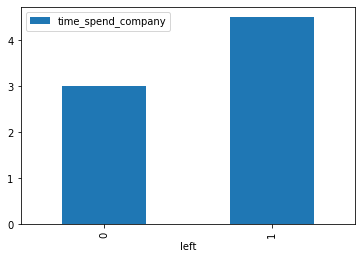

In [7]:
pivot = employee_attrition.pivot_table(index ="left", values ="time_spend_company")
pivot.plot.bar()
plt.show()

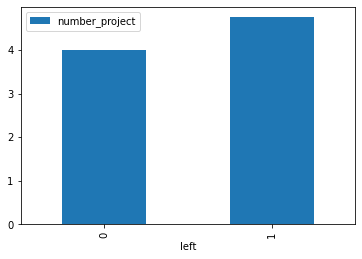

In [8]:
pivot = employee_attrition.pivot_table(index ="left", values ="number_project")
pivot.plot.bar()
plt.show()

In [9]:
employee_attrition.shape

(8, 11)

## prediction

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
columns=['time_spend_company','last_evaluation','number_project','average_monthly_hours','satisfaction_level']
X = employee_attrition[columns]
y= employee_attrition['left']

In [12]:
employee_attrition_train_X, employee_attrition_test_X,employee_attrition_train_y, employee_attrition_test_y = train_test_split(
    X, y, test_size=0.20,random_state=8)

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(employee_attrition_train_X,employee_attrition_train_y)


In [14]:
clf.predict(employee_attrition_train_X)

array([0, 1, 1, 0, 0, 0], dtype=int64)

In [15]:
clf.score(employee_attrition_train_X,employee_attrition_train_y )

0.8333333333333334

In [16]:
clf.predict(employee_attrition_test_X)

array([1, 0], dtype=int64)

In [17]:
clf.score(employee_attrition_test_X,employee_attrition_test_y)

1.0